# TestCase 3

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from create_jsonfile import ask_user,read_config,check_config

# ask_user()
config = read_config(configfile="configs/config3.json")

### Configuration has been read from config.json ###
# dimension : 2
# testcase : 3
# version : 1
# error_estimations : {'param_num': 1}
# gains : {'n_params': 50}


In [3]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]  

In [4]:
assert testcase == 3
check_config(config)

Config file is valid


## Imports + Load network

In [5]:
# export CUDA_VISIBLE_DEVICES=
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
from testcases.utils import create_tree

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
repo_dir = os.path.dirname(repo_dir)
print(repo_dir)
# vérifier que repo_dir finit bien par "code" (à modifier pour l'utilisateur)
assert repo_dir.split("/")[-1] == "code"

/home/u2/lecourtier/Article1/code


In [8]:
from testcases.networks.test_2D.test_3.test_3_v1 import Run_laplacian2D,Poisson_2D
from testcases.problem.problem_2D import TestCase3
problem = TestCase3(version=version)

Using device: cpu
torch loaded; device is cpu


>> load network /home/u2/lecourtier/Article1/code/networks/test_2D/test_fe3.pth
network loaded


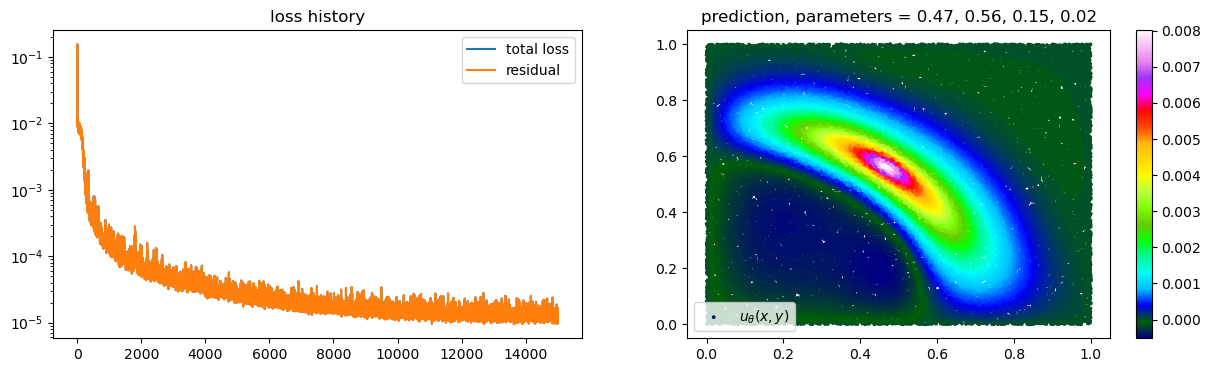

In [9]:
pde = Poisson_2D()
trainer,u_theta = Run_laplacian2D(pde)

## Error estimations

### Imports

In [10]:
from modfenics.error_estimations.error_estimations import ErrorEstimations
from modfenics.error_estimations.compare import CompareMethods

/home/u2/lecourtier/miniconda3/envs/fenics_scimba_modules/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [11]:
param_num = config["error_estimations"]["param_num"]     
error_estimations = ErrorEstimations(param_num, problem, repo_dir = repo_dir)
compare_methods = CompareMethods(error_estimations)
tab_nb_vert = error_estimations.tab_nb_vert

## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/cvg/param1/


### Run FEM

In [12]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = error_estimations.run_fem_deg(degree,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/cvg/param1/FEM_case3_v1_param1_degree1.csv


## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/cvg/param1/FEM_case3_v1_param1_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/cvg/param1/FEM_case3_v1_param1_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/cvg/param1/FEM_case3_v1_param1_degree3.csv


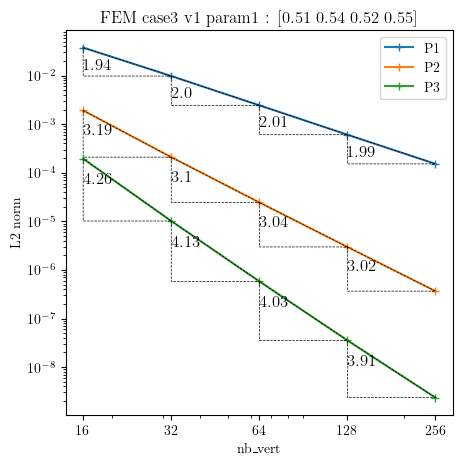

In [13]:
error_estimations.run_fem_alldeg(new_run=False,plot_cvg=True)

### Run Add

In [14]:
degree = 1
df_Corr, tab_h_Corr, tab_err_Corr = error_estimations.run_corr_deg(degree,u_theta,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/cvg/param1/Corr_case3_v1_param1_degree1.csv


## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/cvg/param1/Corr_case3_v1_param1_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/cvg/param1/Corr_case3_v1_param1_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/cvg/param1/Corr_case3_v1_param1_degree3.csv


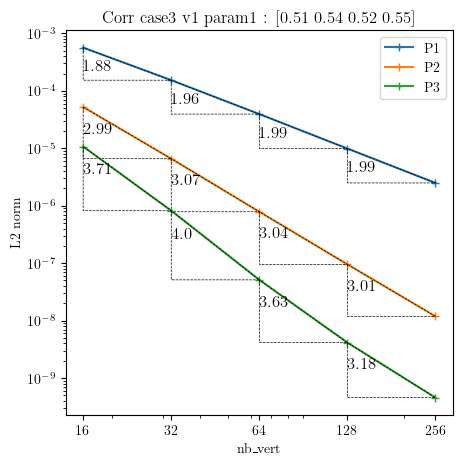

In [15]:
error_estimations.run_corr_alldeg(u_theta,new_run=False,plot_cvg=True)

### Save results

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/cvg/param1/FEM_case3_v1_param1_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/cvg/param1/FEM_case3_v1_param1_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/cvg/param1/FEM_case3_v1_param1_degree3.csv


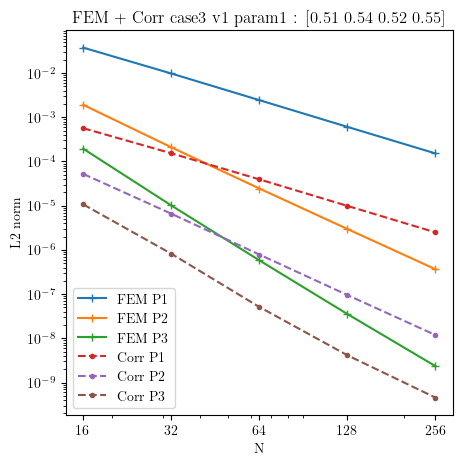

In [16]:
compare_methods.plot_Corr_vs_FEM_alldeg()

In [17]:
compare_methods.save_tab_alldeg_allM()

/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:198: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:202: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:198: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:202: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/comp

## Gains

### Imports

In [18]:
from modfenics.gains.gains import GainsEnhancedFEM
from modfenics.gains.compare import CompareGainsMethods

In [19]:
n_params = config["gains"]["n_params"]   
gains_enhanced_fem = GainsEnhancedFEM(n_params, problem, repo_dir = repo_dir)
compare_gains_methods = CompareGainsMethods(gains_enhanced_fem)

## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/gains/


### Run FEM

In [20]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = gains_enhanced_fem.run_fem_deg(degree,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/gains/FEM_errors_case3_v1_degree1.csv


In [21]:
gains_enhanced_fem.run_fem_alldeg(new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/gains/FEM_errors_case3_v1_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/gains/FEM_errors_case3_v1_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/gains/FEM_errors_case3_v1_degree3.csv


### Run PINNs

In [31]:
# degree = 1
# df_PINNs, tab_nb_vert_PINNs, tab_h_PINNs, tab_err_PINNs = compute_error_pinns_deg(n_params,problem,degree,high_degree,u_theta,new_run=False,result_dir=result_dir)

In [22]:
gains_enhanced_fem.run_pinns_alldeg(u_theta,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/gains/PINNs_errors_case3_v1_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/gains/PINNs_errors_case3_v1_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/gains/PINNs_errors_case3_v1_degree3.csv


### Run Add

In [41]:
# degree = 1
# df_Corr, tab_nb_vert_Corr, tab_h_Corr, tab_err_Corr = compute_error_Corr_deg(n_params,problem,degree,high_degree,u_theta,new_run=False,result_dir=result_dir)

In [23]:
gains_enhanced_fem.run_corr_alldeg(u_theta,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/gains/Corr_errors_case3_v1_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/gains/Corr_errors_case3_v1_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/gains/Corr_errors_case3_v1_degree3.csv


### Compare methods

In [43]:
# degree = 1
# df_errors,df_gains = create_dataframes_deg(n_params,problem,degree,result_dir=result_dir)

In [24]:
compare_gains_methods.create_dataframes_alldeg_allM()

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/gains/FEM_errors_case3_v1_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/gains/FEM_errors_case3_v1_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/gains/FEM_errors_case3_v1_degree3.csv


In [25]:
compare_gains_methods.save_stats_alldeg_allM()

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/gains/FEM_errors_case3_v1_degree1.csv
method        PINNs                         FEM                     
type            min     max   mean    std   min    max   mean    std
method n_vert                                                       
Corr   20      2.26   50.10  17.35  11.21  7.12  82.57  35.67  17.55
       40      4.84  185.73  62.52  43.15  6.80  77.55  33.91  16.36


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")


/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/gains/FEM_errors_case3_v1_degree2.csv
method          PINNs                              FEM                    
type              min      max     mean      std   min    max   mean   std
method n_vert                                                             
Corr   20       15.03   623.17   213.18   143.68  3.54  35.88  18.32  7.95
       40      118.35  4942.28  1560.00  1096.15  2.37  31.82  14.83  7.49


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")


/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/version1/gains/FEM_errors_case3_v1_degree3.csv
method           PINNs                                 FEM                   
type               min       max      mean       std   min    max  mean   std
method n_vert                                                                
Corr   20       151.67   3295.53   1111.11    750.19  1.33  26.51  8.32  5.02
       40      1939.42  62146.51  14375.23  12088.42  1.03  19.80  5.77  3.86


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")
